In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/data/qlyu/v1/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
outdir = "/data/qlyu/v1/results"
outdir

'/data/qlyu/v1/results'

# get data

In [4]:
# get updated cell types
f = "/data/qlyu/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_1536993/716257834.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [5]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [6]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,2,3,-1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    adata = adata[adata.obs['Type'].str.contains('L2/3')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    types = tmp['newtype'].values
    # types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    sample_and_type = sample_codes + "_" + types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
print(pbulks.shape)
pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks.shape)

P28NR.h5ad
['1_L2/3_A' '1_L2/3_B' '1_L2/3_C' '2_L2/3_A' '2_L2/3_B' '2_L2/3_C']
(6, 53801)
P38NR.h5ad
(6, 53801)
P28DR.h5ad
(6, 53801)
P38DR.h5ad
(6, 53801)
(4, 6, 53801)
(4, 2, 3, 53801)


In [7]:
pbulks = pbulks.reshape(2,4,3,53801)
print(pbulks.shape)

(2, 4, 3, 53801)


In [8]:
# check the pbulks are good -- log10(CPM+1) for each sample
checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
checkpbulks.shape, np.all(np.abs(checkpbulks-1e6) < 1e-6)

((2, 4, 3), True)

In [9]:
# xclsts_short = np.array([clst[len("1a_"):] for clst in xclsts[0]]) #, '_'
xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
xclsts_short, xclsts_short.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), (3,))

# filter out small bulk profiles

In [10]:
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
xclsts_sel = xclsts_short[numcells.min(axis=1)>50]
unq_types = xclsts_sel
xclsts_selidx = basicu.get_index_from_array(xclsts_short, xclsts_sel)
pbulks = pbulks[:,:,xclsts_selidx,:]
xclsts_sel, xclsts_selidx, xclsts_sel.shape

(array(['L2/3_A', 'L2/3_B', 'L2/3_C'], dtype='<U6'), array([0, 1, 2]), (3,))

In [11]:
numcells.min(axis=1).sort_values()

L2/3_A    108
L2/3_C    190
L2/3_B    422
dtype: int64

# filter out unexpressed genes

In [12]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T
print(tensor_nr.shape)
print(tensor_dr.shape)

# mean exp of CPM=10 in any subclass in either NR or DR
expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(10+1), axis=1) 
expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(10+1), axis=1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)

genes_comm = genes[expressed_any]
genes_cidx = np.arange(len(genes))[expressed_any] 
tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

print(tensor_nr.shape)
print(tensor_dr.shape)

(53801, 3, 4)
(53801, 3, 4)
(9241, 3, 4)
(9241, 3, 4)


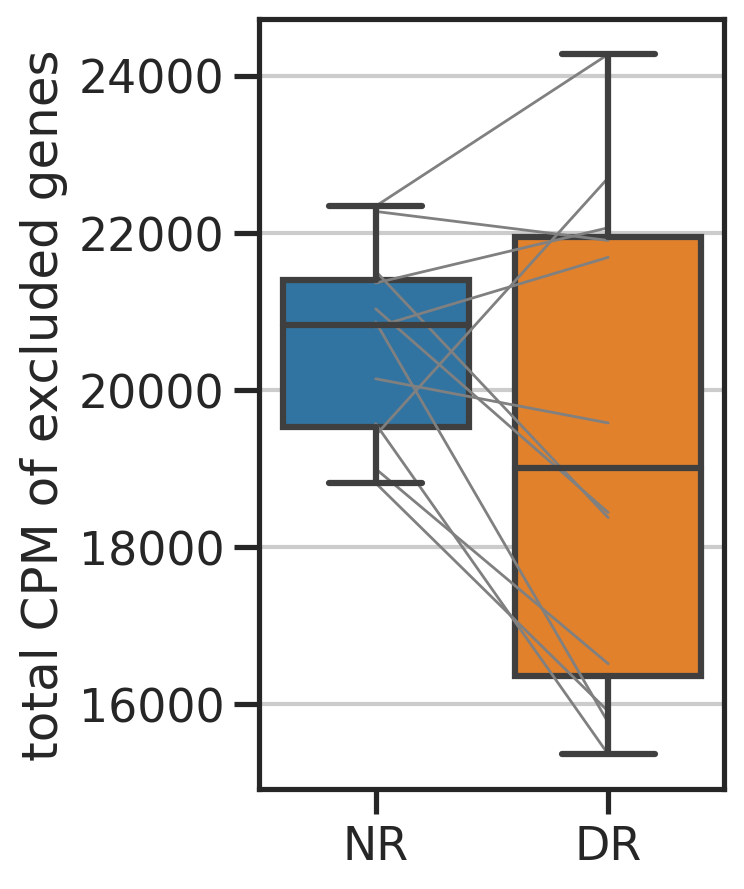

In [13]:
idx = np.arange(len(genes))[~expressed_any]
tensor_nr_ctrl = pbulks[0].T[idx]
tensor_dr_ctrl = pbulks[1].T[idx]

a = np.sum(np.power(10, tensor_nr_ctrl)-1, axis=0).ravel()
b = np.sum(np.power(10, tensor_dr_ctrl)-1, axis=0).ravel()

fig, ax = plt.subplots(figsize=(3,5))
for ai, bi in zip(a,b):
    ax.plot([0,1], [ai,bi], '-', color='gray', linewidth=1, markersize=1)
sns.boxplot([a,b], ax=ax)
ax.set_ylabel('total CPM of excluded genes')
ax.set_xticklabels(['NR', 'DR'])
plt.show()

# Do the tests

In [14]:
# test for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=2)
rs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
rs = rs.reshape(ps.shape)
qs = qs.reshape(ps.shape)

# effect size
lfc = np.log2(10)*(np.mean(tensor_dr, axis=2) - np.mean(tensor_nr, axis=2)) # log2FC (log10CPM as raw counts)
# higherexp = np.maximum(np.mean(tensor_dr, axis=2), np.mean(tensor_nr, axis=2)) # mean exp for every gene type pair in the higher expressed condition

# why -- not expressed
i, j = np.where(np.isnan(ps))
np.isnan(ps).sum(), np.sum(tensor_nr[i,j]), np.sum(tensor_dr[i,j])

(0, 0.0, 0.0)

In [15]:
fc_threshold = 2
cond1   = rs # FDR< 0.05
cond2   = np.abs(lfc) >  np.log2(fc_threshold) 
cond2up = lfc         >  np.log2(fc_threshold) 
cond2dn = lfc         < -np.log2(fc_threshold) 

sde    = np.all([cond1, cond2],   axis=0)
sde_up = np.all([cond1, cond2up], axis=0)
sde_dn = np.all([cond1, cond2dn], axis=0)

sigsum = pd.DataFrame(index=unq_types)
sigsum['rej']   = np.sum(rs, axis=0)
sigsum['DE']    = np.sum(sde, axis=0)
sigsum['DR_up'] = np.sum(sde_up, axis=0)
sigsum['DR_dn'] = np.sum(sde_dn, axis=0)
sigsum

,rej,DE,DR_up,DR_dn
L2/3_A,489,70,60,10
L2/3_B,1999,391,184,207
L2/3_C,1776,305,226,79


In [16]:
# def extract_res_onetype(idx):
#     return genes_comm[sde_up[:,idx]], genes_comm[sde_dn[:,idx]]

# sigsum_genes = sigsum.copy()
# ups = []
# dns = []
# for i, (_type, row) in enumerate(sigsum.iterrows()):
#     _up, _dn = extract_res_onetype(i)
#     ups.append(", ".join(_up))
#     dns.append(", ".join(_dn))
    
# sigsum_genes['genes_up'] = ups 
# sigsum_genes['genes_dn'] = dns 
# sigsum_genes
# # sigsum_genes.to_csv('../results/P28_NR_DR_DEGs_Oct27.csv', header=True, index=True)

In [17]:
res = pd.DataFrame()
gi_up, ti_up = sde_up.nonzero()
gi_dn, ti_dn = sde_dn.nonzero()
res['gene'] = genes_comm[np.hstack([gi_up, gi_dn])]
res['type'] = unq_types[np.hstack([ti_up, ti_dn])]
res['reason'] = ['DRup']*len(gi_up) + ['DRdn']*len(gi_dn)

# res.to_csv(os.path.join(outdir, 'DEGs_NRvsDR_P28P38_April11.csv'), header=True, index=False)
res

,gene,type,reason
0,Gm29107,L2/3_B,DRup
1,Prim2,L2/3_B,DRup
2,Prim2,L2/3_C,DRup
3,Bag2,L2/3_A,DRup
4,Bag2,L2/3_B,DRup
...,...,...,...
761,Mamdc2,L2/3_B,DRdn
762,Gm28578,L2/3_B,DRdn
763,Gm28578,L2/3_C,DRdn
764,Rbm20,L2/3_B,DRdn


In [18]:
res.groupby(['type', 'reason']).size().unstack().fillna(0).astype(int) #.value_counts()

reason,DRdn,DRup
type,,
L2/3_A,10,60
L2/3_B,207,184
L2/3_C,79,226


In [19]:
res['gene'].unique().shape

(525,)

In [20]:
# res.groupby('type').sum()

# show results

In [21]:
def show_onetype(idx, columns=["NR_1", "NR_2", "NR_3", "NR_4", 
                               "DR_1", "DR_2", "DR_3", "DR_4",
                              ]):
    """idx - cell type idx
    """
    gidx = np.logical_or(sde_up[:,idx], sde_dn[:,idx])
    _genes = genes_comm[gidx]

    p_nr = tensor_nr[gidx,:,:][:,idx,:]
    p_dr = tensor_dr[gidx,:,:][:,idx,:]
    
    
    ab = np.hstack([p_nr, p_dr])
    nr_mean = np.mean(p_nr, axis=1)
    ab = (ab - nr_mean.reshape(-1,1))*np.log2(10) # log2 FC w.r.t. the mean in NR
    ab = pd.DataFrame(ab, index=_genes, columns=columns)
    
    this_mlfc = (np.mean(p_nr, axis=1) - np.mean(p_dr, axis=1))*np.log2(10)
    this_ordr = np.argsort(this_mlfc)
    ab = ab.iloc[this_ordr]
    
    fig, ax = plt.subplots(figsize=(4, min(10, 0.3*len(ab))))
    sns.heatmap(ab, center=0, cmap='coolwarm', yticklabels=True, cbar_kws=dict(shrink=0.5, label='log2 FC (w.r.t. NR mean)'))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(unq_types[idx])
    plt.show()

In [22]:
def show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=None, bbox_to_anchor=(1,1), loc=None):
    """
    """
    eff = lfc[:,thetypeidx]
    pvl =  qs[:,thetypeidx]

    cnd_up = np.all([cond1[:,thetypeidx], 
                     cond2up[:,thetypeidx]], axis=0) 
    cnd_dn = np.all([cond1[:,thetypeidx], 
                     cond2dn[:,thetypeidx]], axis=0) 

    if ax is None:
        fig, ax = plt.subplots()
    else:
        pass
    ax.scatter(eff, -np.log10(pvl), s=1, color='gray')

    ax.scatter(eff[cnd_up], -np.log10(pvl)[cnd_up], s=5, #s=5, 
               label=f'DR up (n={cnd_up.sum():,})')
    ax.scatter(eff[cnd_dn], -np.log10(pvl)[cnd_dn], s=5, #s=5, 
               label=f'DR dn (n={cnd_dn.sum():,})')

    ax.set_xlabel('log2(FC) (DR/NR in CPM)')
    ax.set_ylabel('-log10(FDR)')
    ax.set_title(f'{thetype}')
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc=loc)
    return ax

In [23]:
types_order = [
    'L2/3_A', 
    'L2/3_B', 
    'L2/3_C', 
]
len(types_order)

3

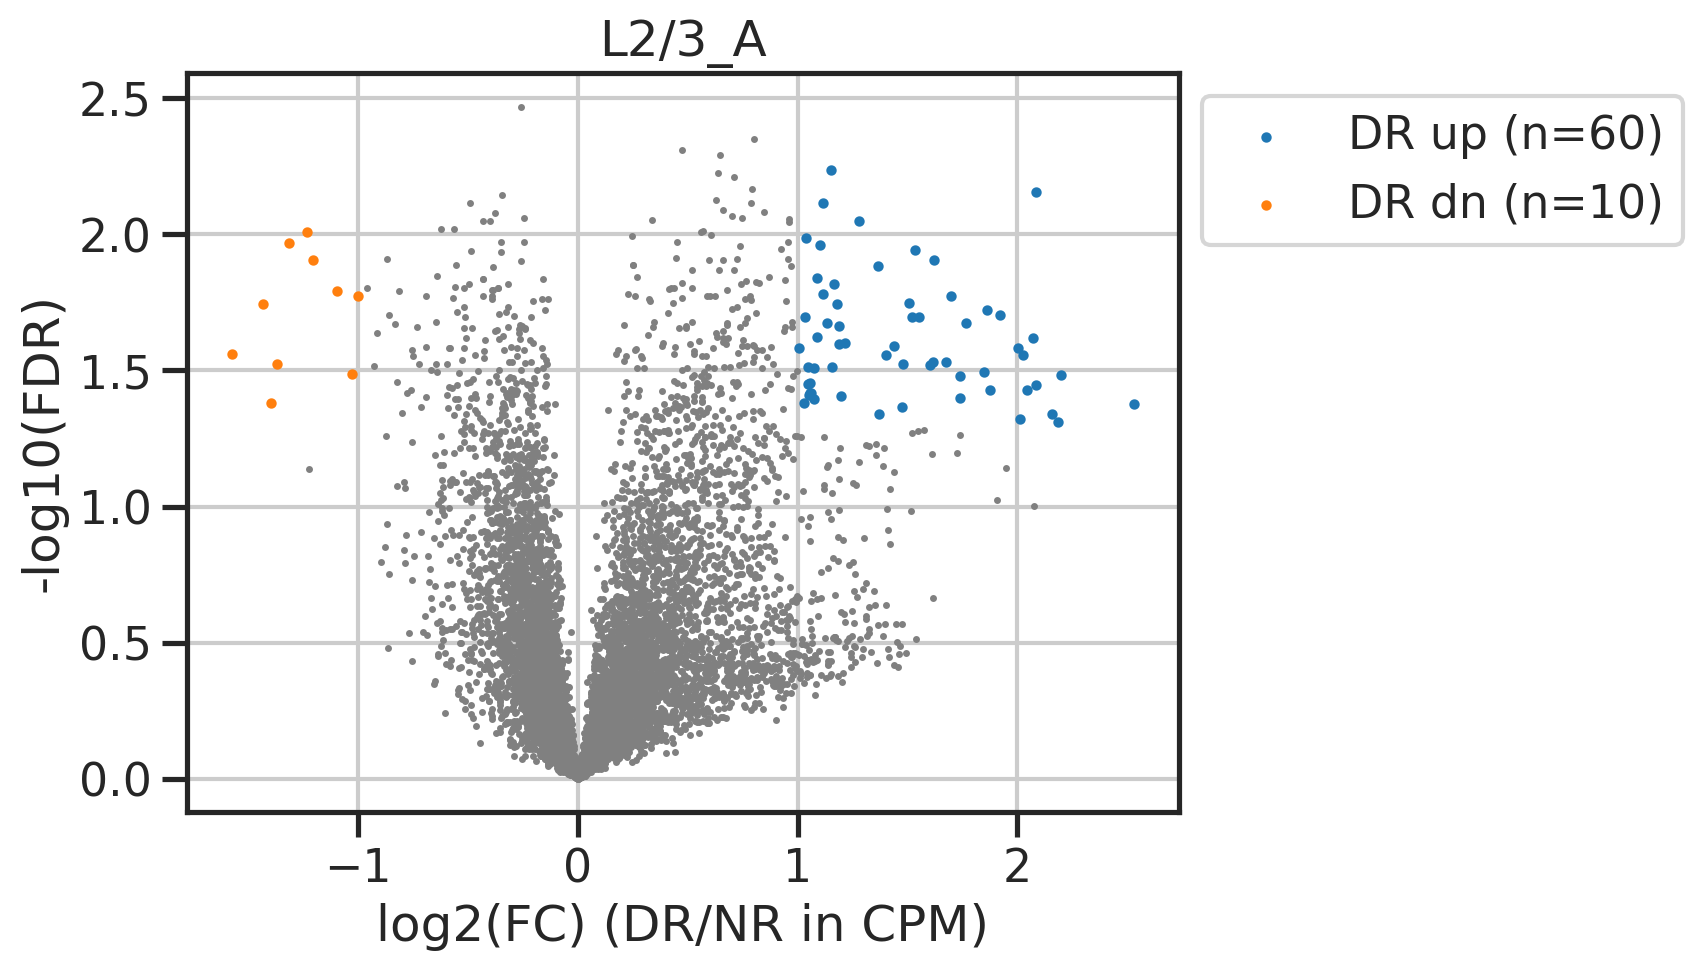

In [24]:
thetype = 'L2/3_A'
thetypeidx = basicu.get_index_from_array(unq_types, [thetype])[0]
assert thetypeidx != -1
show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn) 
plt.show()

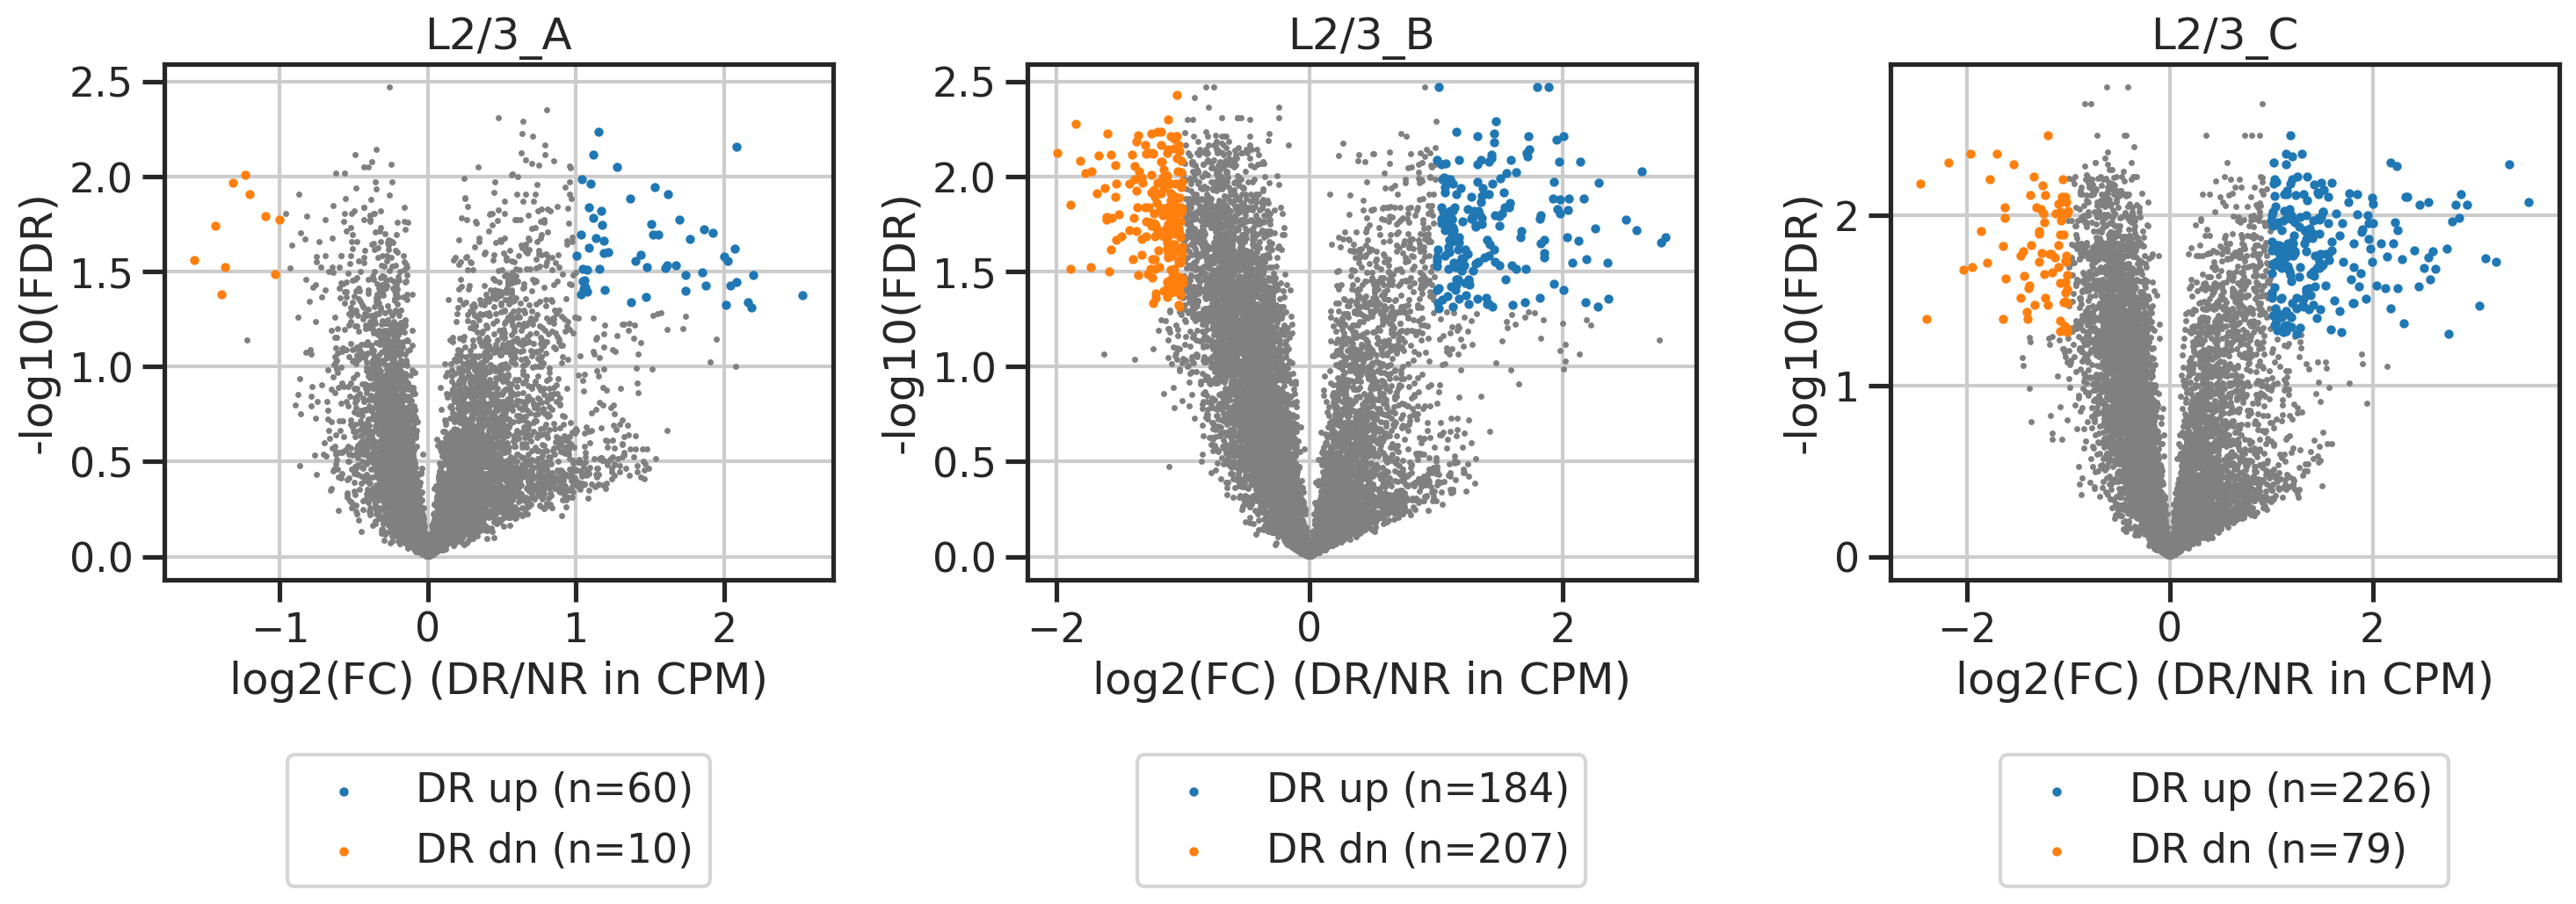

In [25]:
fig, axs = plt.subplots(1,3,figsize=(5*3,6*1))
for thetypeidx, thetype in enumerate(unq_types):
    assert thetypeidx != -1
    ax = axs.flat[thetypeidx]
    show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=ax, bbox_to_anchor=(0.5, -0.3), loc='upper center') 
fig.tight_layout()
plt.show()

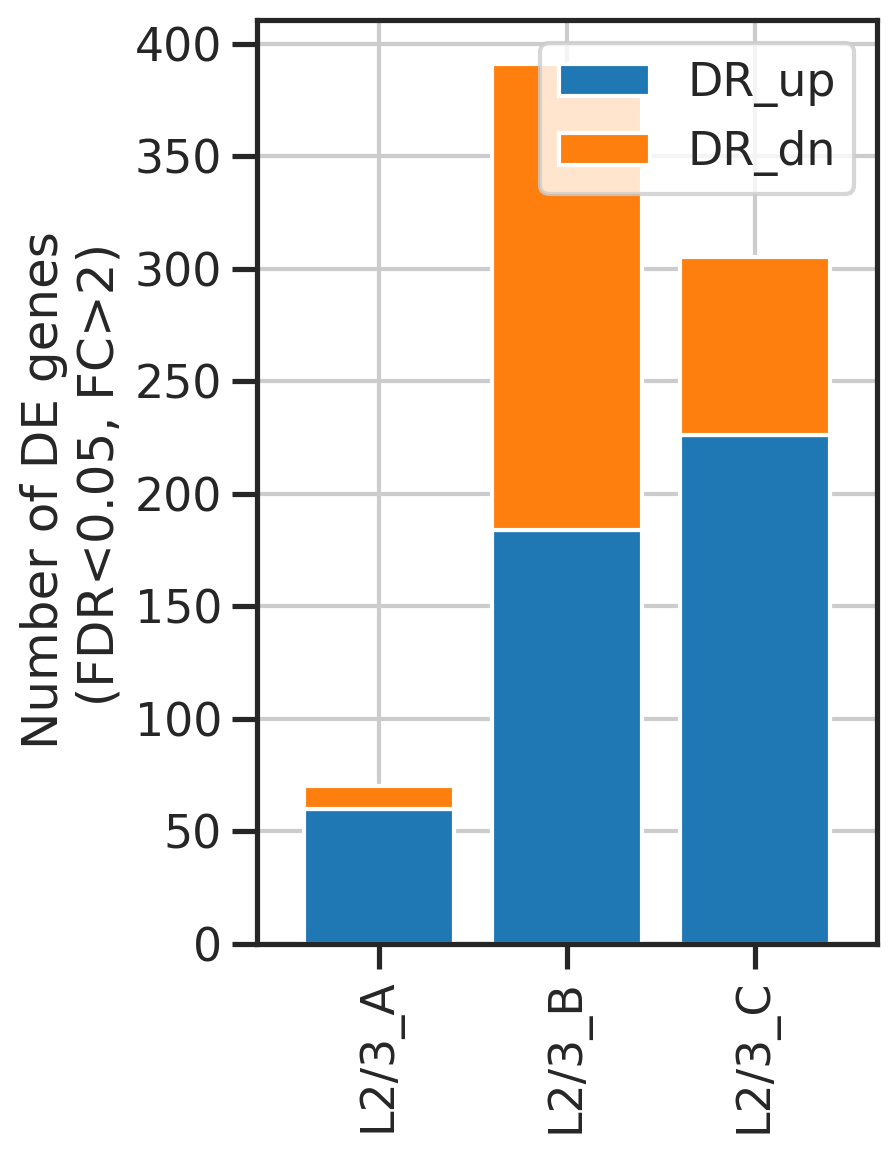

In [26]:
fig, ax = plt.subplots(figsize=(4,6))
sigsum.loc[types_order][['DR_up', 'DR_dn']].plot.bar(stacked=True, width=0.8, ax=ax)
ax.set_ylabel('Number of DE genes \n (FDR<0.05, FC>2)')
plt.show()

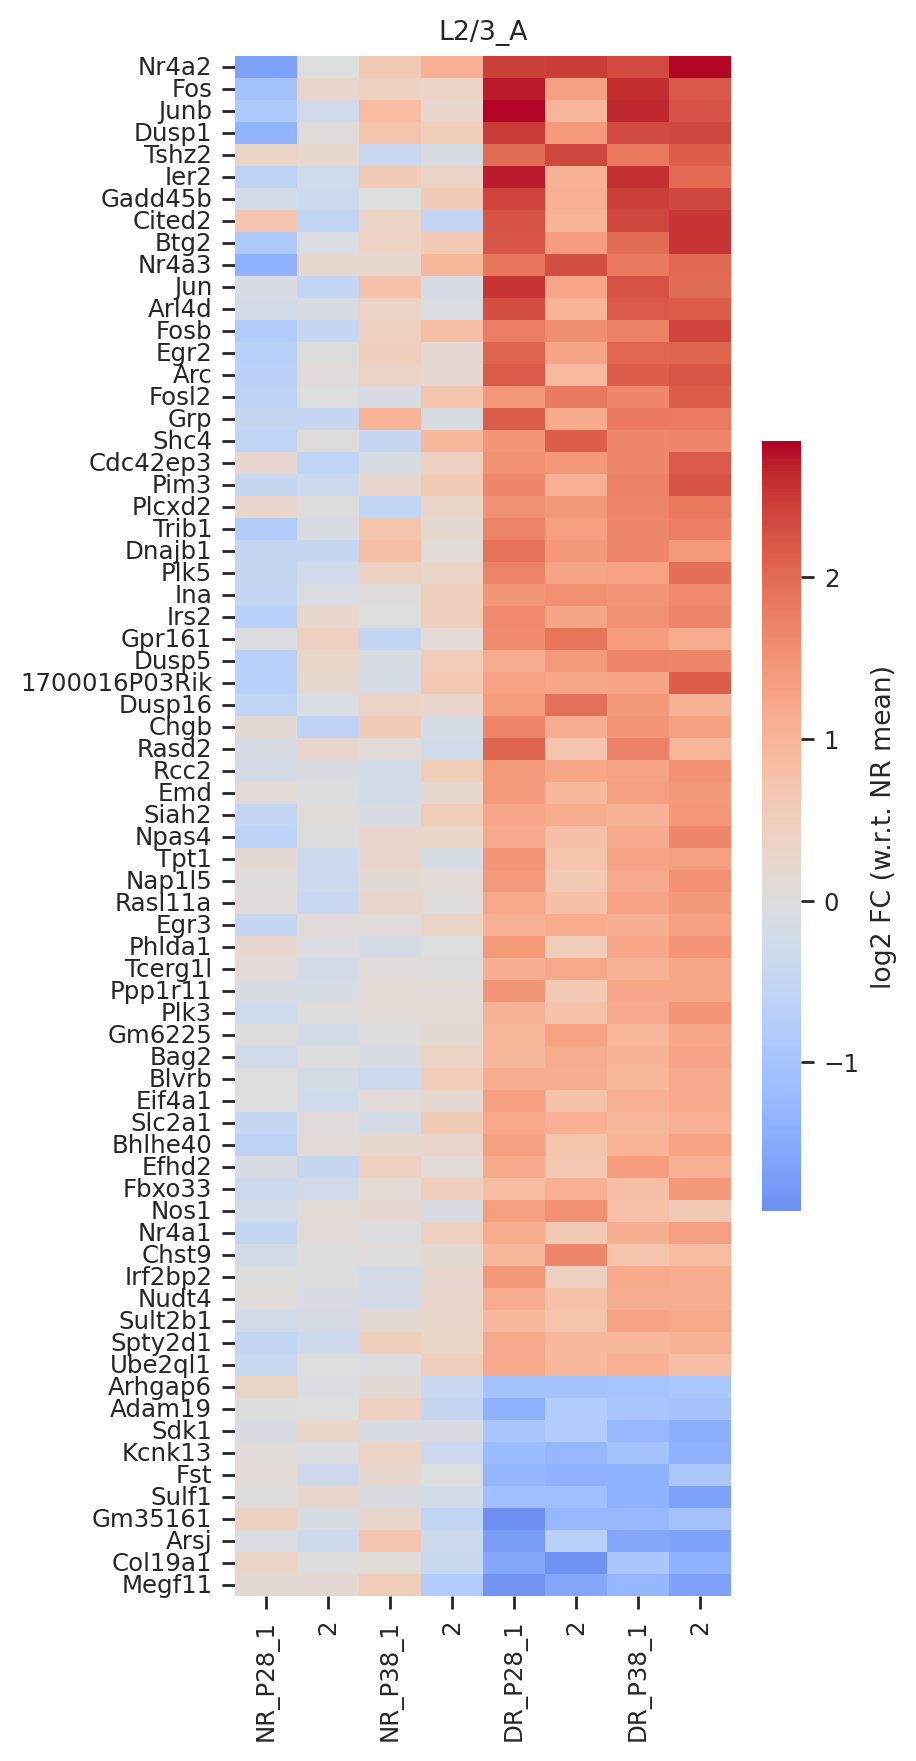

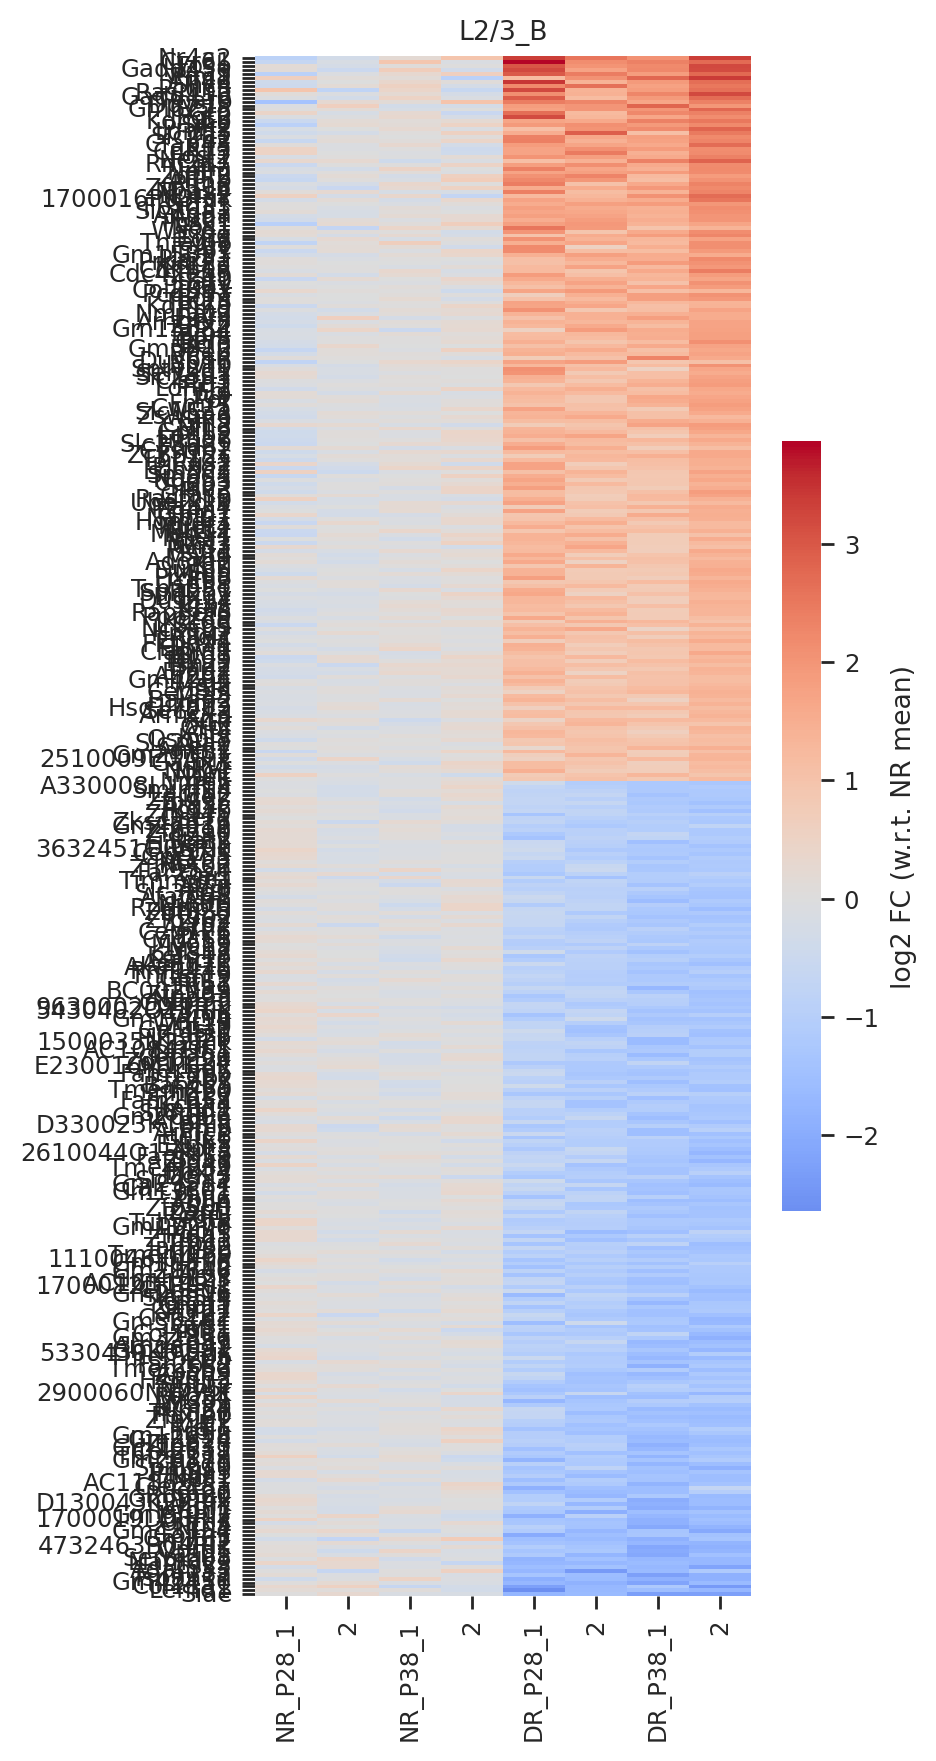

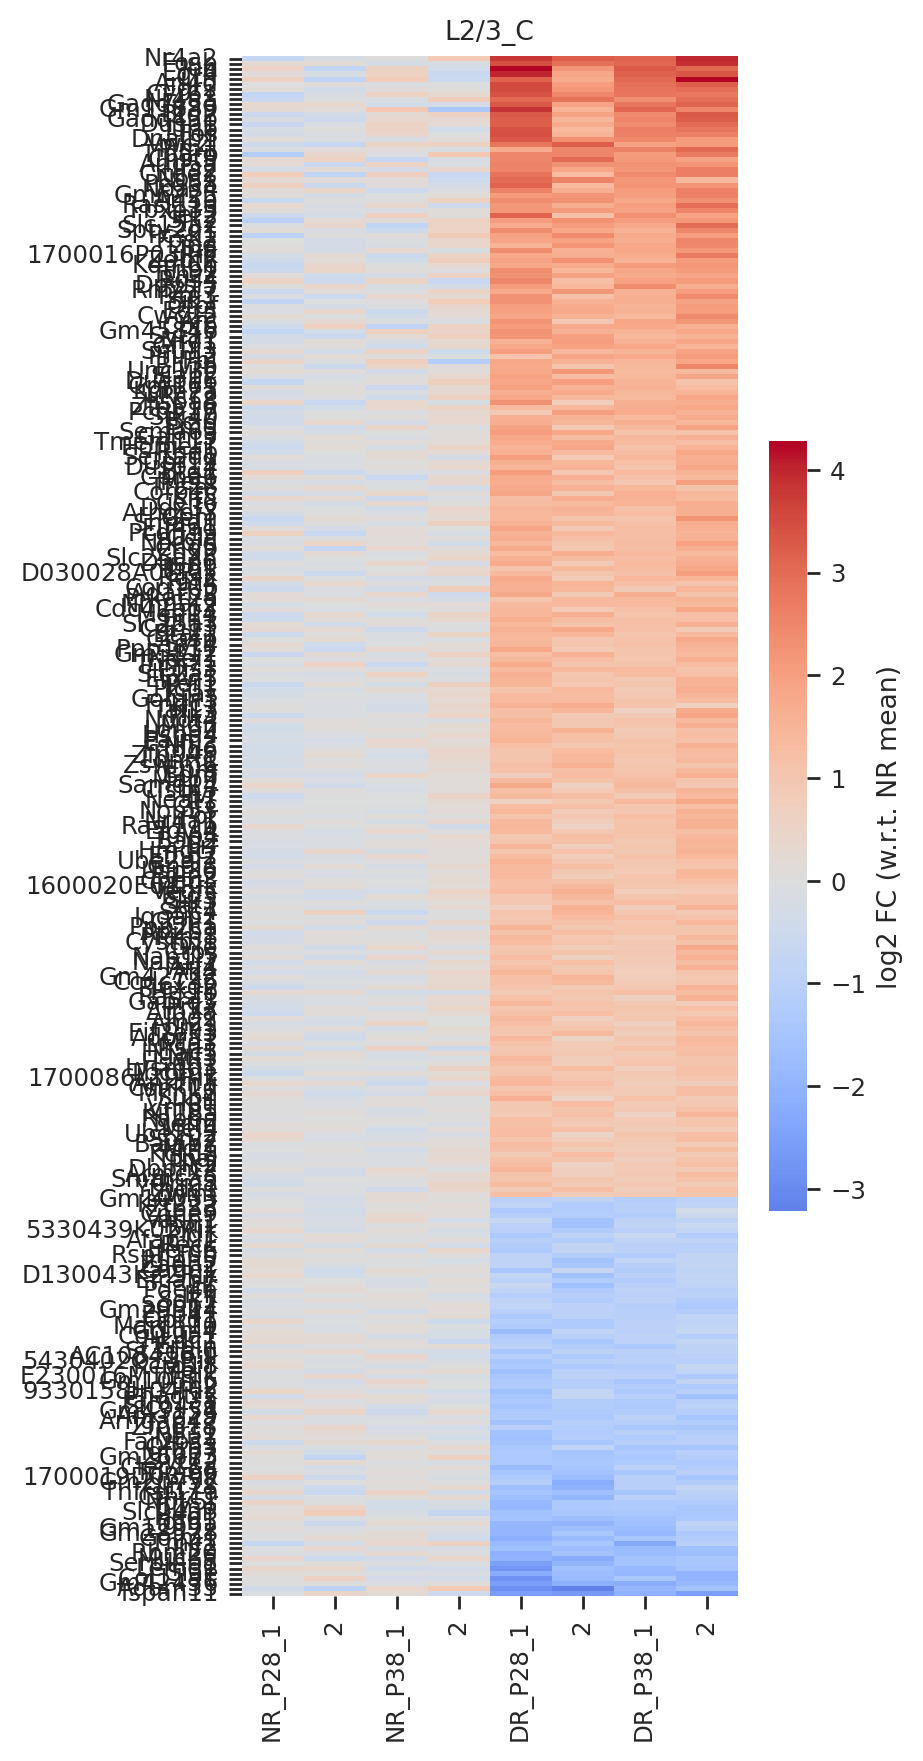

In [27]:
columns = [
    'NR_P28_1', '2', 'NR_P38_1', '2',
    'DR_P28_1', '2', 'DR_P38_1', '2',
]
with sns.plotting_context('paper'):
    for i, (_type, row) in enumerate(sigsum.iterrows()):
        if row['DE'] > 0:
            show_onetype(i, columns=columns)

# Check a few genes and see

1.8743892216759575 0.03726885811516448


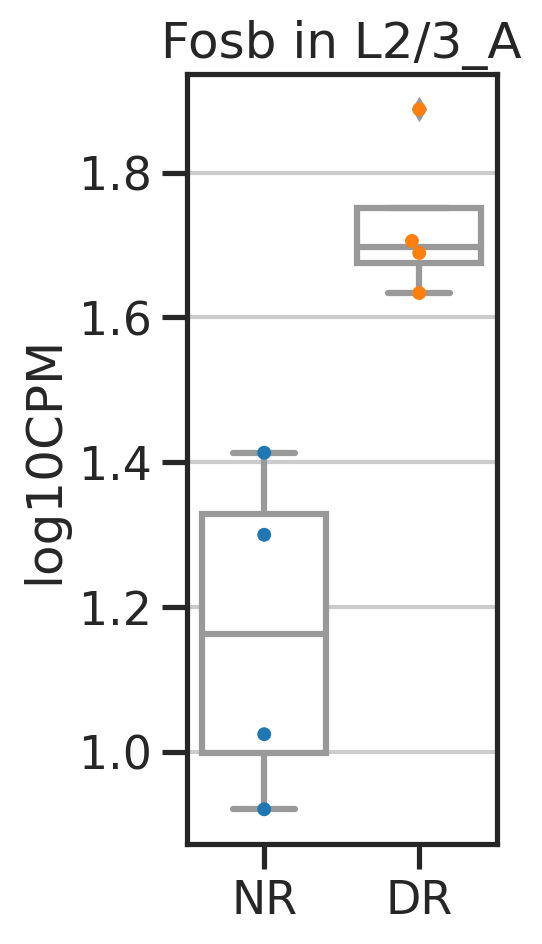

0.273834648064393 0.16768172381710345


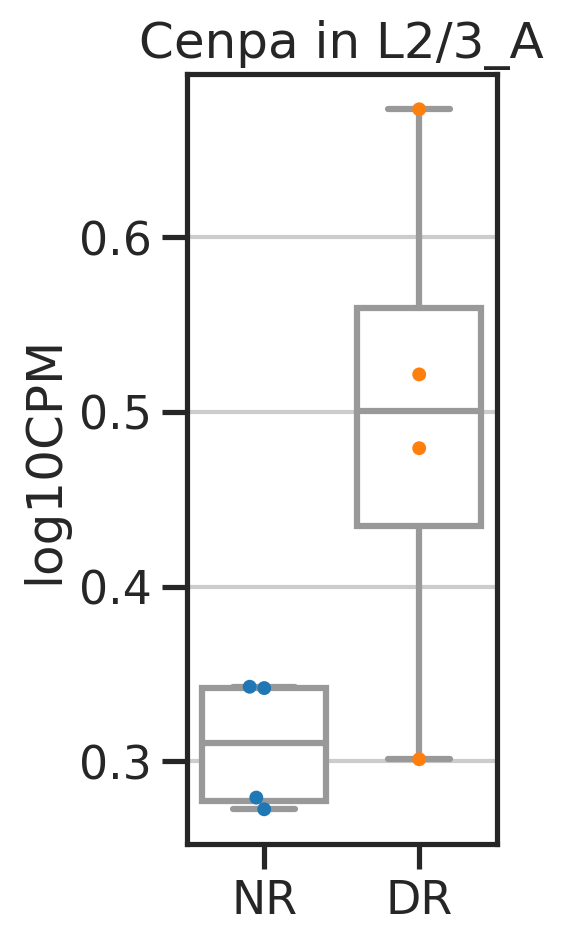

-0.47814341465180704 0.08709551283106728


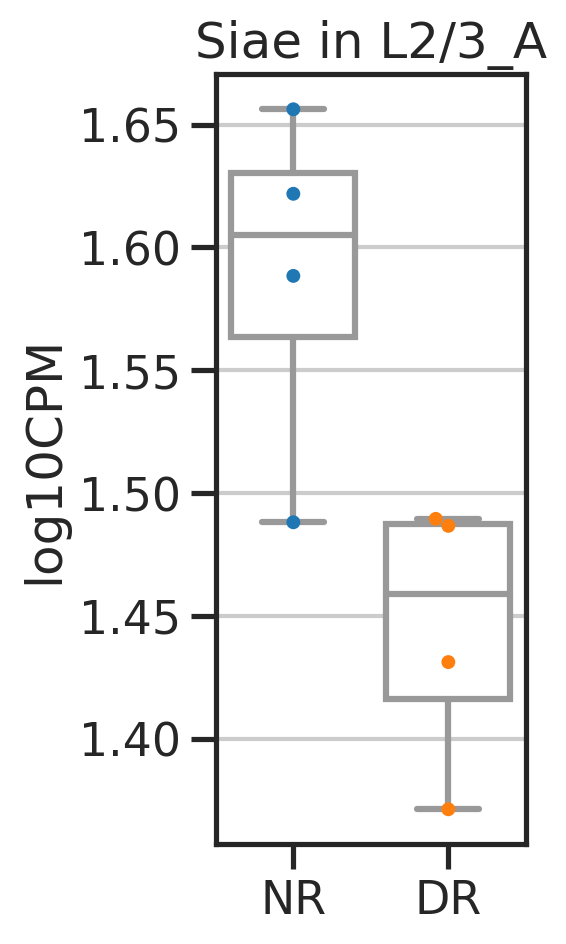

-0.2932182037937915 0.6456228396039023


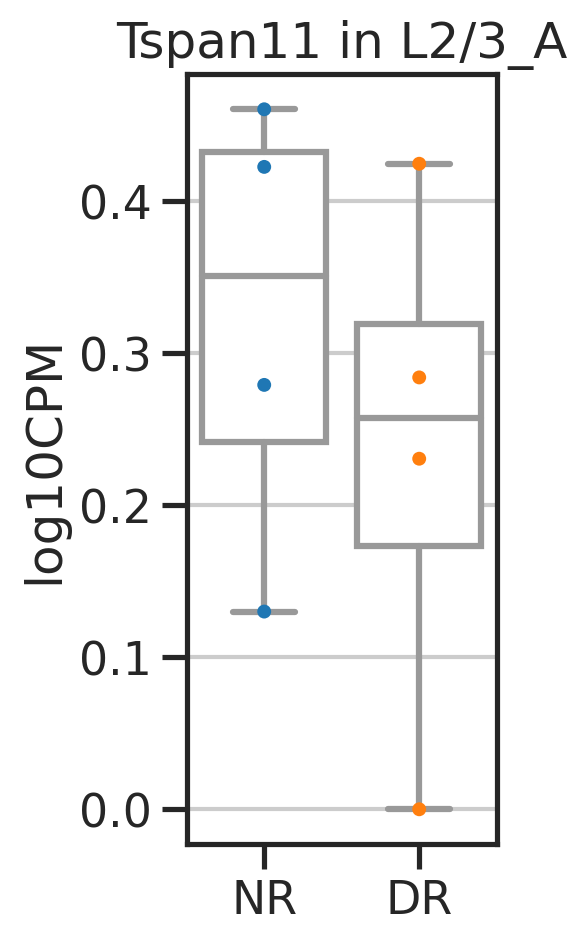

In [28]:
for gene_name in ['Fosb', 'Cenpa', 'Siae', 'Tspan11']: #['Col19a1', 'Nr4a2', 'Fosb']:
    # gene_name = 'Col19a1'
    type_name = 'L2/3_A'
    gidx = basicu.get_index_from_array(genes, [gene_name])[0]
    gidx2 = basicu.get_index_from_array(genes_comm, [gene_name])[0]
    cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
    p_nr, p_dr = pbulks[:,:,:,gidx][:,:,cidx]
    assert gidx != -1
    assert cidx != -1

    fig, ax = plt.subplots(figsize=(2,5))
    sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
    sns.swarmplot([p_nr, p_dr], s=5, ax=ax)
    
    # check
    # l2fc2 = np.log2(10)*(np.mean(p_dr) - np.mean(p_nr))
    eff = lfc[gidx2, cidx]
    q   = qs[gidx2, cidx]
    print(eff, q)
    
    ax.set_xticklabels(['NR', 'DR'])
    ax.set_ylabel('log10CPM')
    ax.set_title(f'{gene_name} in {type_name}')
    plt.show()

# a plot of those unique genes across all cell types

In [29]:
from scipy.stats import zscore

In [30]:
degs = np.unique(res['gene'])
degs_idx = basicu.get_index_from_array(genes, degs)

In [31]:
a = pbulks[:,:,:,degs_idx].T
a = np.swapaxes(a,2,3)
a0,a1,a2,a3 = a.shape # gene, type, cond, rep
am = zscore(np.mean(a, axis=(2,3)), axis=1)
af = zscore(a.reshape(a0, a1*a2*a3), axis=1)

rowidx = np.array(basicu.order_by_hc(af))
colidx = np.array(basicu.order_by_hc(am.T))
# colidx = basicu.get_index_from_array(xclsts_sel, types_order)
colidx_expanded = np.ravel(a2*a3*colidx.reshape(-1,1) + np.repeat(np.arange(a2*a3).reshape(1,-1), len(colidx), axis=0))

In [32]:
a.shape

(525, 3, 2, 4)

In [33]:
nr_mean = np.mean(a, axis=3)[:,:,0]
a_lfc = np.log2(10)*(a-nr_mean.reshape(a0,a1,1,1))
af_lfc = a_lfc.reshape(a0, a1*a2*a3)

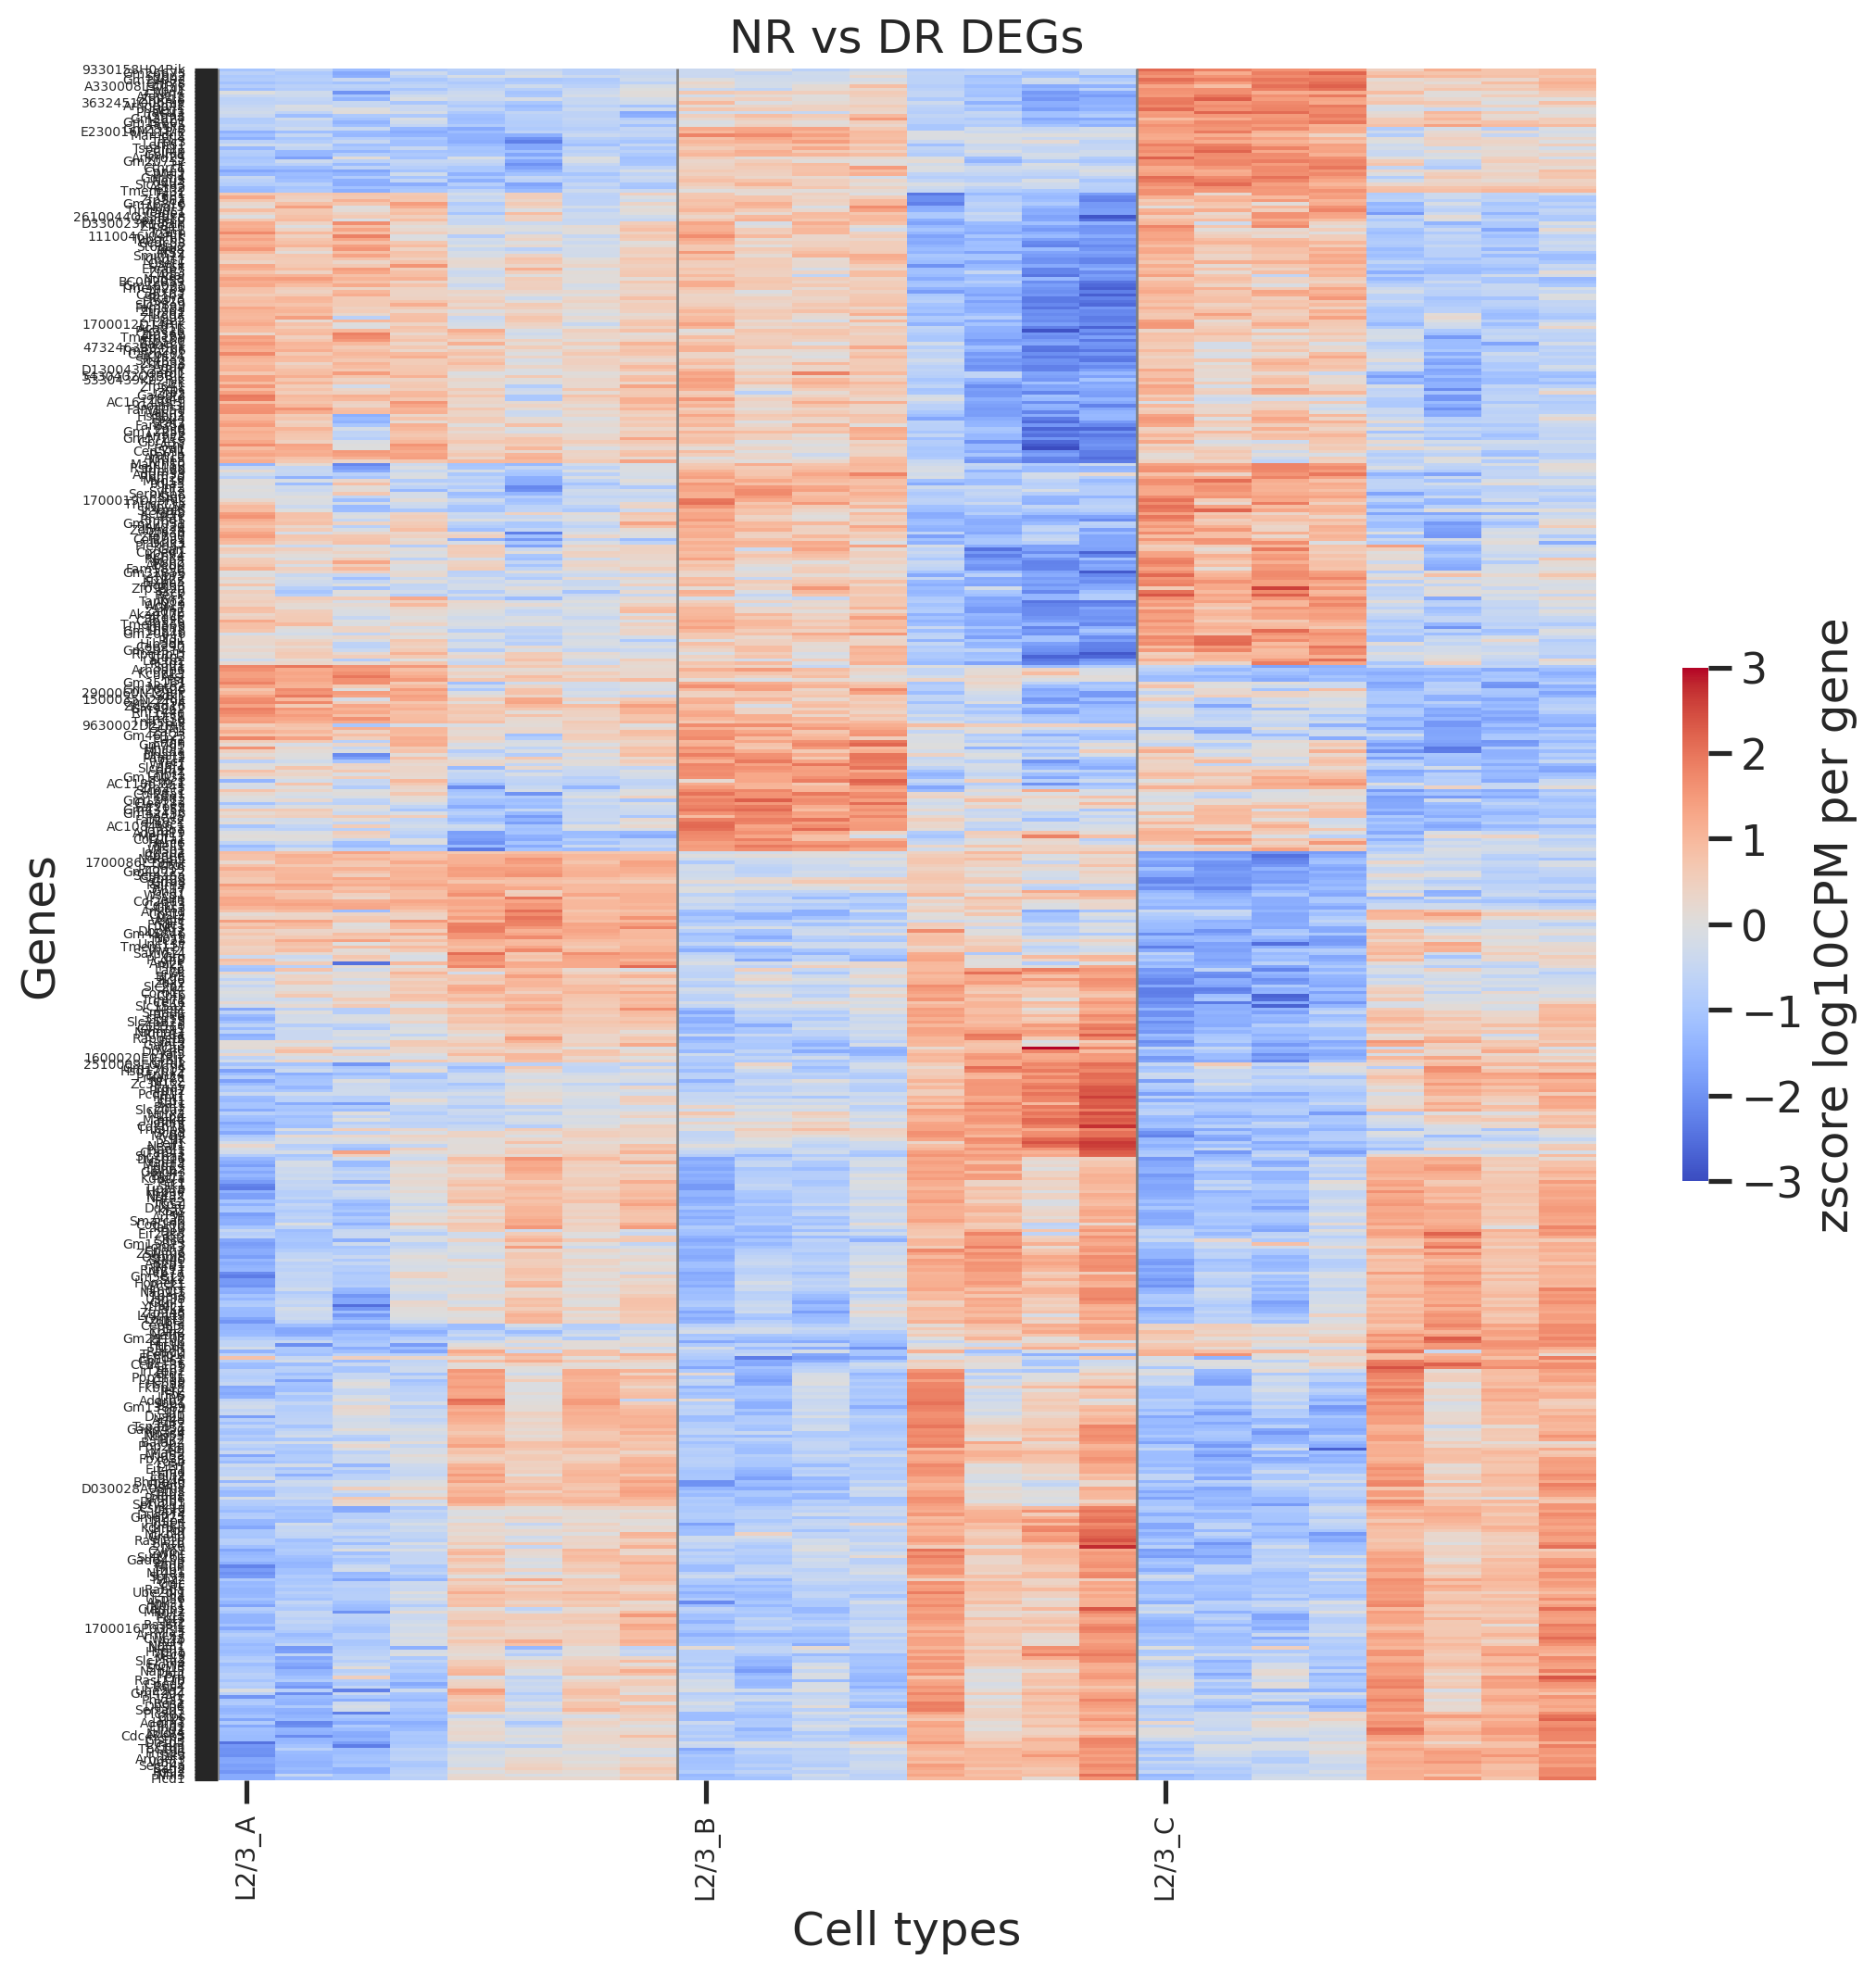

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-3, vmax=3,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(unq_types[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(degs[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

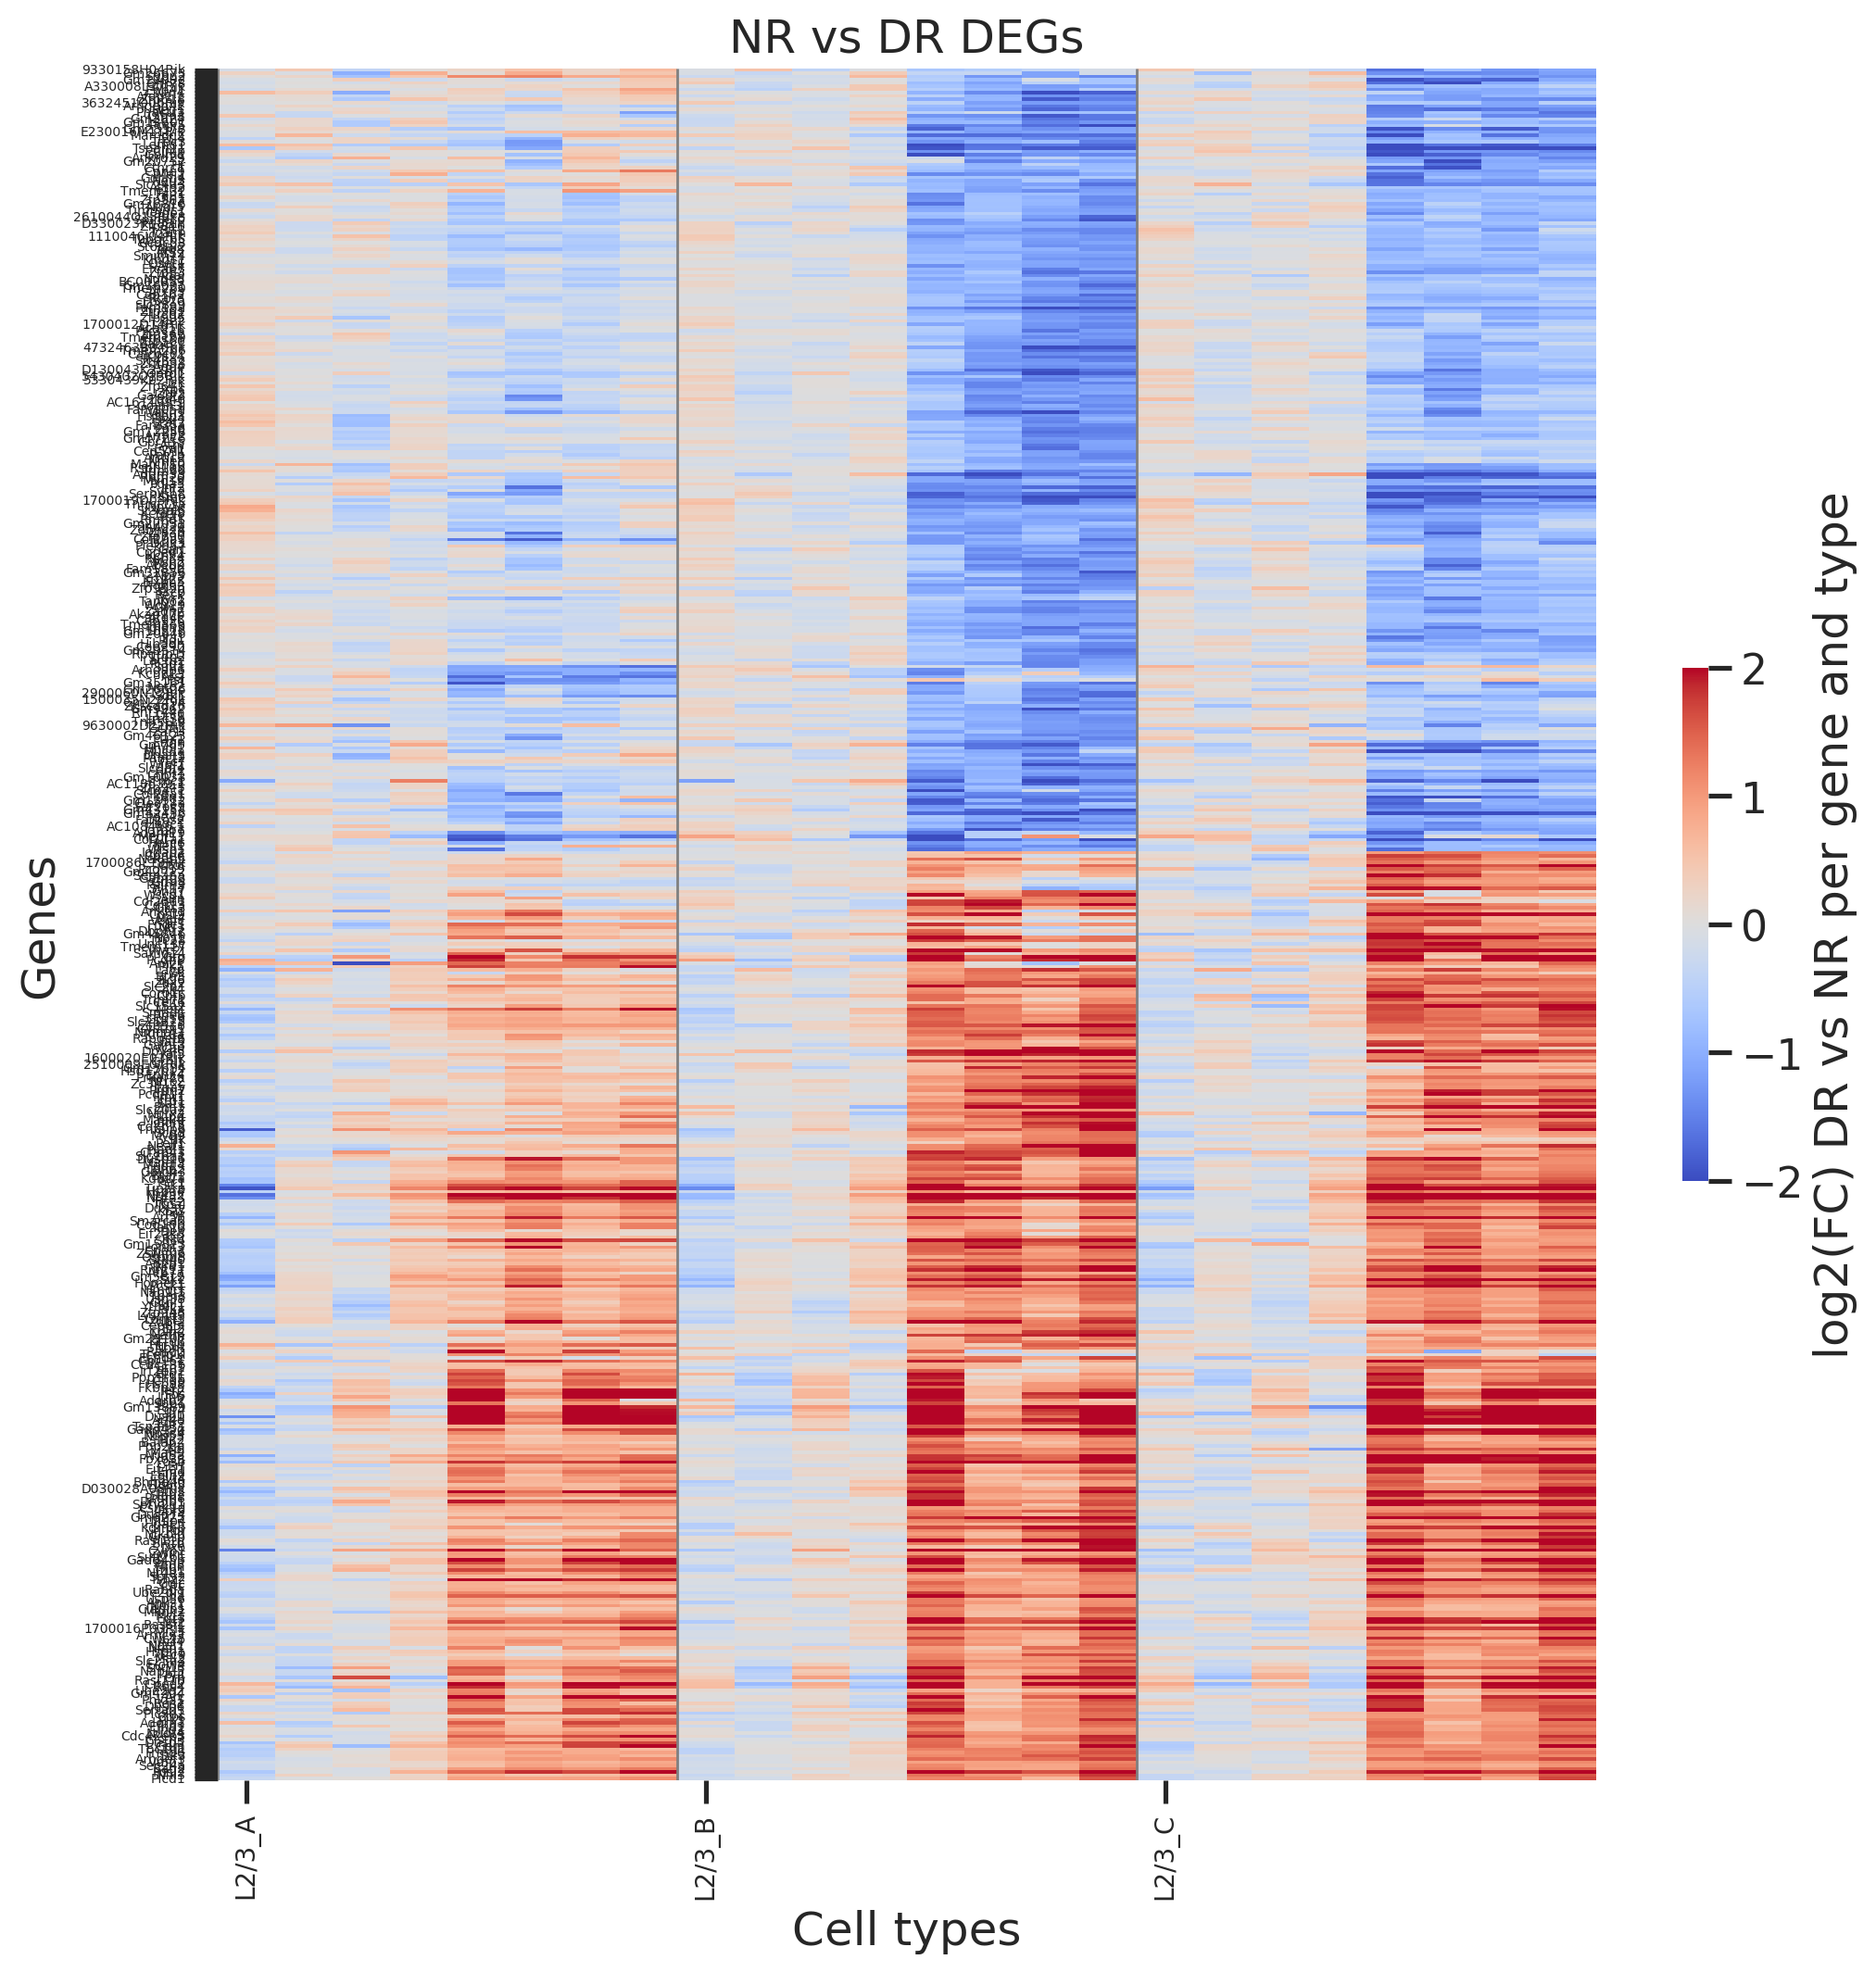

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(unq_types[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(degs[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

# overlap with type genes

In [36]:
def num_up(reasons):
    return np.sum(reasons == 'DRup')

def num_dn(reasons):
    return np.sum(reasons == 'DRdn')
    
def overall(reasons):
    a = num_up(reasons)
    b = num_dn(reasons)
    
    if a == 0 and b > 0:
        return 'DR_dn'
    elif b == 0 and a > 0:
        return 'DR_up'
    elif a > 0 and b > 0:
        return 'DR_updn'

resflat = res.groupby('gene').agg({'reason': (num_up, num_dn, overall)})['reason'] #  'reason': get_num_dn})
resflat

,num_up,num_dn,overall
gene,,,
1110046J04Rik,0,1,DR_dn
1500035N22Rik,0,1,DR_dn
1600020E01Rik,1,0,DR_up
1700012D14Rik,0,1,DR_dn
1700016P03Rik,3,0,DR_up
...,...,...,...
Zfp995,0,1,DR_dn
Zhx2,2,0,DR_up
Zkscan16,0,1,DR_dn


In [37]:
#
cond_overlap1 = (
         (resflat['num_up'] != 0) & 
         (resflat['num_dn'] != 0)
       )
cond_overlap2 = (
         (resflat['num_up'] != 0) & 
         (resflat['num_dn'] == 0)
       )
cond_overlap3 = (
         (resflat['num_up'] == 0) & 
         (resflat['num_dn'] != 0)
       )

# resflat[cond_overlap1]
print("up and down", cond_overlap1.sum())
print("up only", cond_overlap2.sum())
print("down only", cond_overlap3.sum())

up and down 0
up only 285
down only 240


In [38]:
# f = '/data/qlyu/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot.csv'
# fout = '/data/qlyu/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot_v2.csv'

# df2 = pd.read_csv(f)
# df2['DR_DE'] = df2['gene'].apply(lambda x: x in degs) 
# df2 = pd.merge(df2, resflat['overall'].rename('DR_updn'), left_on='gene', right_index=True, how='left')
# df2.to_csv(fout, header=True, index=False)
# df2

In [39]:
f = '/data/qlyu/v1/data/cheng21_cell_scrna/res/L23-ABC-genes-n288-n286unq-annot_v2.csv'
df2 = pd.read_csv(f)
df2

,gene,group,ispicked,P17on,P14,DR,DR_DE,DR_updn
0,Matn2,A2,True,A,BC,1,False,NaN
1,Fam126a,A2,False,A,unsure,1,False,NaN
2,Egfem1,A2,True,A,unsure,unsure,False,NaN
3,Gm19410,A2,False,A,unsure,1,False,NaN
4,Grk3,A2,False,A,unsure,1,False,NaN
...,...,...,...,...,...,...,...,...
281,Brinp3,C3,True,C,BC,unsure,False,NaN
282,Ell2,C3,True,C,unsure,3,True,DR_up
283,Gm21949,C3,False,C,unsure,unsure,False,NaN
284,Jdp2,C3,True,C,BC,3,False,NaN


In [40]:
typegenes = df2['gene'].values
degs_up = resflat[resflat['overall']=='DR_up'].index.values
degs_dn = resflat[resflat['overall']=='DR_dn'].index.values

detgs = np.intersect1d(degs, typegenes)
detgs_up = np.intersect1d(degs_up, typegenes)
detgs_dn = np.intersect1d(degs_dn, typegenes)
print(degs.shape, typegenes.shape, detgs.shape)
print(detgs.shape, detgs_up.shape, detgs_dn.shape)
detgs, detgs_up, detgs_dn

(525,) (286,) (55,)
(55,) (28,) (27,)


(array(['1700086L19Rik', '3632451O06Rik', 'Afap1l1', 'Airn', 'Arhgap42',
        'Astn2', 'Bdnf', 'Cbln2', 'Cdh13', 'Clmp', 'Col11a1', 'Col23a1',
        'Col26a1', 'Cpne6', 'Cpne9', 'Ell2', 'Epb41', 'Etl4', 'Gabrg3',
        'Glis3', 'Gm42722', 'Golim4', 'Grm8', 'Heg1', 'Hkdc1', 'Igfn1',
        'Iqgap2', 'Kcnk13', 'Kctd8', 'Lemd1', 'Mei1', 'Myh9', 'Nckap5',
        'Nefm', 'Nell1', 'Neu2', 'Npas4', 'Npr3', 'Nptx2', 'Ntn4', 'Olfm3',
        'Otof', 'Palm2', 'Pcdh19', 'Pcsk5', 'Scg3', 'Sema6a', 'Sgpp2',
        'Slc24a3', 'Syt17', 'Tmem117', 'Tmem232', 'Ttc28', 'Vwc2l',
        'Zfp618'], dtype=object),
 array(['1700086L19Rik', 'Airn', 'Bdnf', 'Cbln2', 'Cdh13', 'Col23a1',
        'Cpne6', 'Ell2', 'Gabrg3', 'Glis3', 'Gm42722', 'Grm8', 'Iqgap2',
        'Kctd8', 'Myh9', 'Nckap5', 'Nefm', 'Npas4', 'Nptx2', 'Otof',
        'Palm2', 'Pcdh19', 'Scg3', 'Sema6a', 'Syt17', 'Tmem117', 'Ttc28',
        'Vwc2l'], dtype=object),
 array(['3632451O06Rik', 'Afap1l1', 'Arhgap42', 'Astn2', 'Clmp', 'Col1

In [41]:
dfplot = pd.merge(resflat['overall'].rename('DR'), df2.set_index('gene')['P17on'].rename('type'), 
                  left_index=True, right_index=True, how='outer')
dfplot['isType']= ~pd.isna(dfplot['type'])
dfplot['isDR']  = ~pd.isna(dfplot['DR'])
dfplot['DR_up'] = dfplot['DR'].apply(lambda x: x == 'DR_up') 
dfplot['DR_dn'] = dfplot['DR'].apply(lambda x: x == 'DR_dn') 
dfplot

,DR,type,isType,isDR,DR_up,DR_dn
gene,,,,,,
1110046J04Rik,DR_dn,NaN,False,True,False,True
1500035N22Rik,DR_dn,NaN,False,True,False,True
1600020E01Rik,DR_up,NaN,False,True,True,False
1700012D14Rik,DR_dn,NaN,False,True,False,True
1700016P03Rik,DR_up,NaN,False,True,True,False
...,...,...,...,...,...,...
Zhx2,DR_up,NaN,False,True,True,False
Zkscan16,DR_dn,NaN,False,True,False,True
Zmat4,NaN,C,True,False,False,False


In [42]:
# from matplotlib_venn import venn2
# from matplotlib_venn import venn3

# # set_list = [
# #     set(typegenes.tolist()), 
# #     set(degs.tolist()),
# # ]
# # fig, ax = plt.subplots()
# # venn2(set_list, set_labels=('L2/3 type genes', 'DR DE genes'), ax=ax)
# # plt.show()

# set_list = [
#     set(typegenes.tolist()), 
#     set(degs_up.tolist()),
#     set(degs_dn.tolist()),
# ]
# fig, ax = plt.subplots()
# venn3(set_list, set_labels=('L2/3 type genes', 'DR up genes', 'DR dn'), ax=ax)
# plt.show()

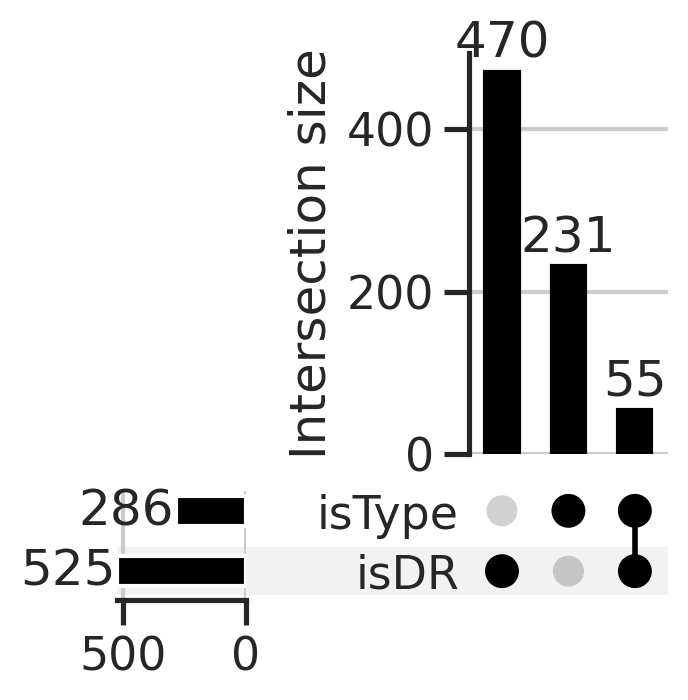

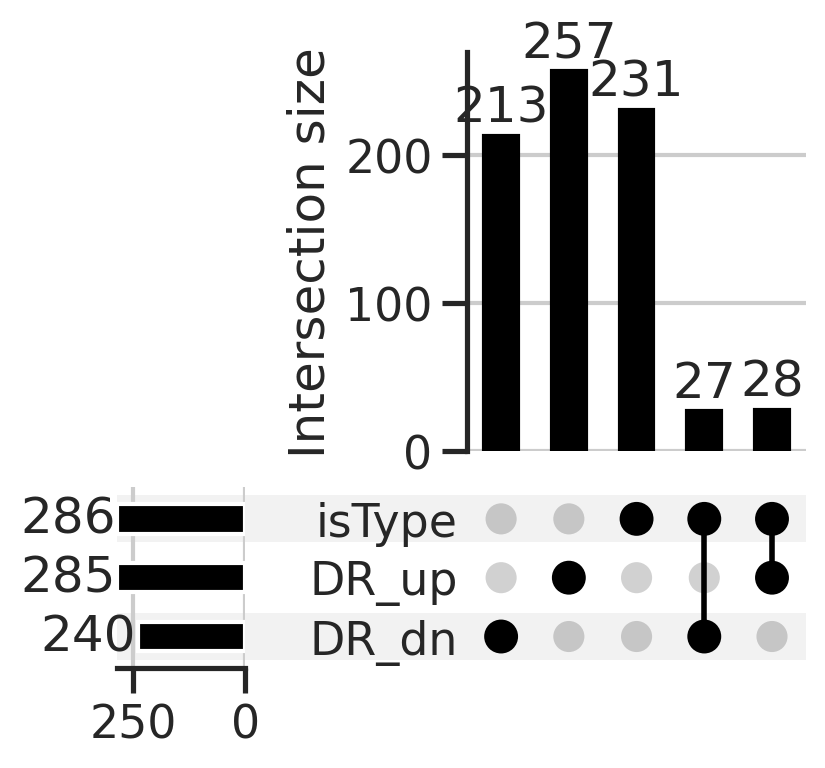

In [43]:
from upsetplot import plot, from_indicators
fig = plt.figure(figsize=(4,6))
plot(from_indicators(indicators=['isType', 'isDR'], data=dfplot), show_counts=True, fig=fig, sort_categories_by='-input')
plt.show()

fig = plt.figure(figsize=(4,6))
plot(from_indicators(indicators=['isType', 'DR_up', 'DR_dn'], data=dfplot), show_counts=True, fig=fig, sort_categories_by='-input')
plt.show()

# visualize those that goes up or down

In [44]:
plotgenes = df2.loc[df2['DR_DE'], 'gene'].values
plotgenes_annot = df2.loc[df2['DR_DE'], 'P17on'].values
plotgenes_idx = basicu.get_index_from_array(genes, plotgenes)

row = plotgenes
col = unq_types

In [45]:
a = pbulks[:,:,:,plotgenes_idx].T
a = np.swapaxes(a,2,3)
a0,a1,a2,a3 = a.shape # gene, type, cond, rep
am = zscore(np.mean(a, axis=(2,3)), axis=1)
af = zscore(a.reshape(a0, a1*a2*a3), axis=1)

rowidx = np.array(basicu.order_by_hc(af))
colidx = np.array([0,1,2])

colidx_expanded = np.ravel(a2*a3*colidx.reshape(-1,1) + np.repeat(np.arange(a2*a3).reshape(1,-1), len(colidx), axis=0))
col_expanded = np.ravel(np.repeat(np.arange(a2*a3).reshape(1,-1), len(col), axis=0))

In [46]:
nr_mean = np.mean(a, axis=3)[:,:,0]
a_lfc = np.log2(10)*(a-nr_mean.reshape(a0,a1,1,1))
af_lfc = a_lfc.reshape(a0, a1*a2*a3)

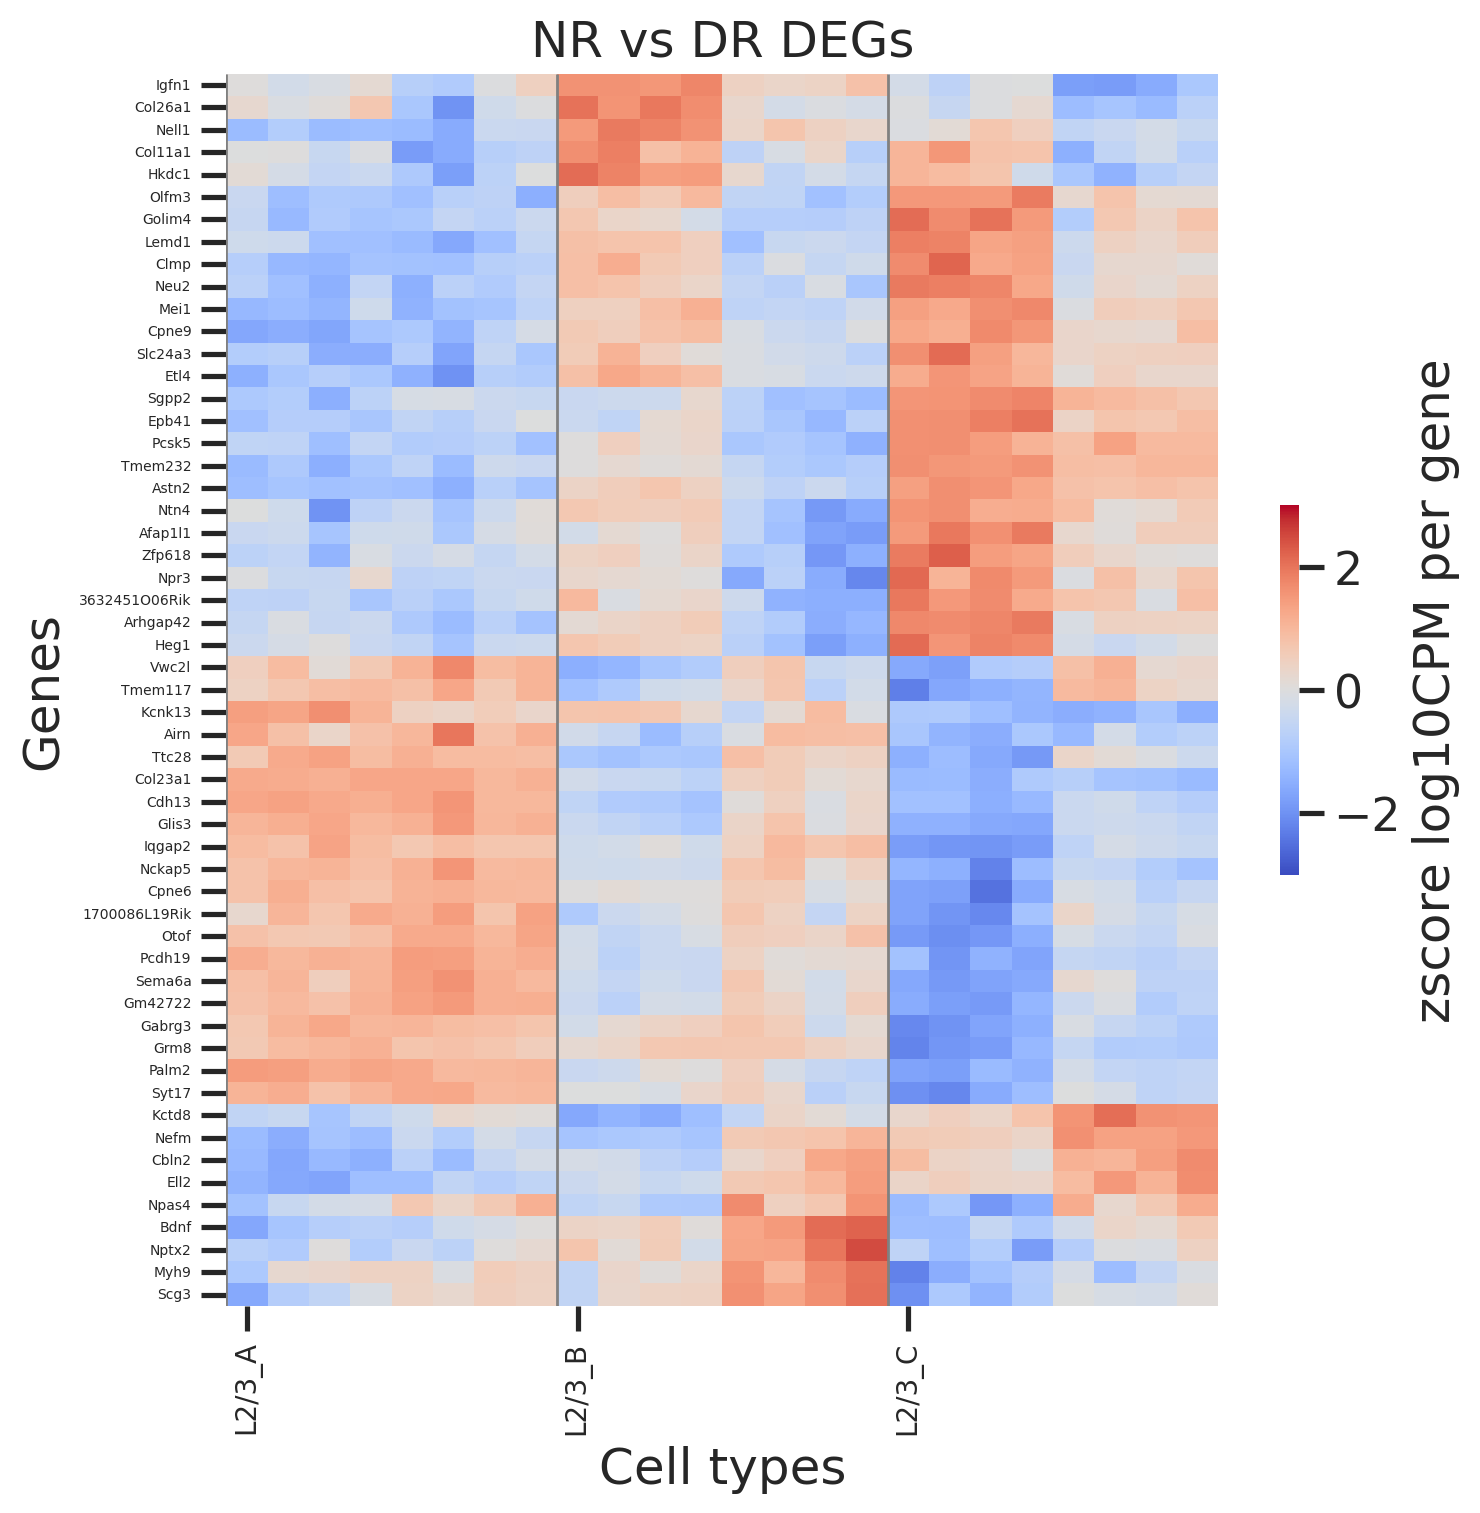

In [47]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True,
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-3, vmax=3,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

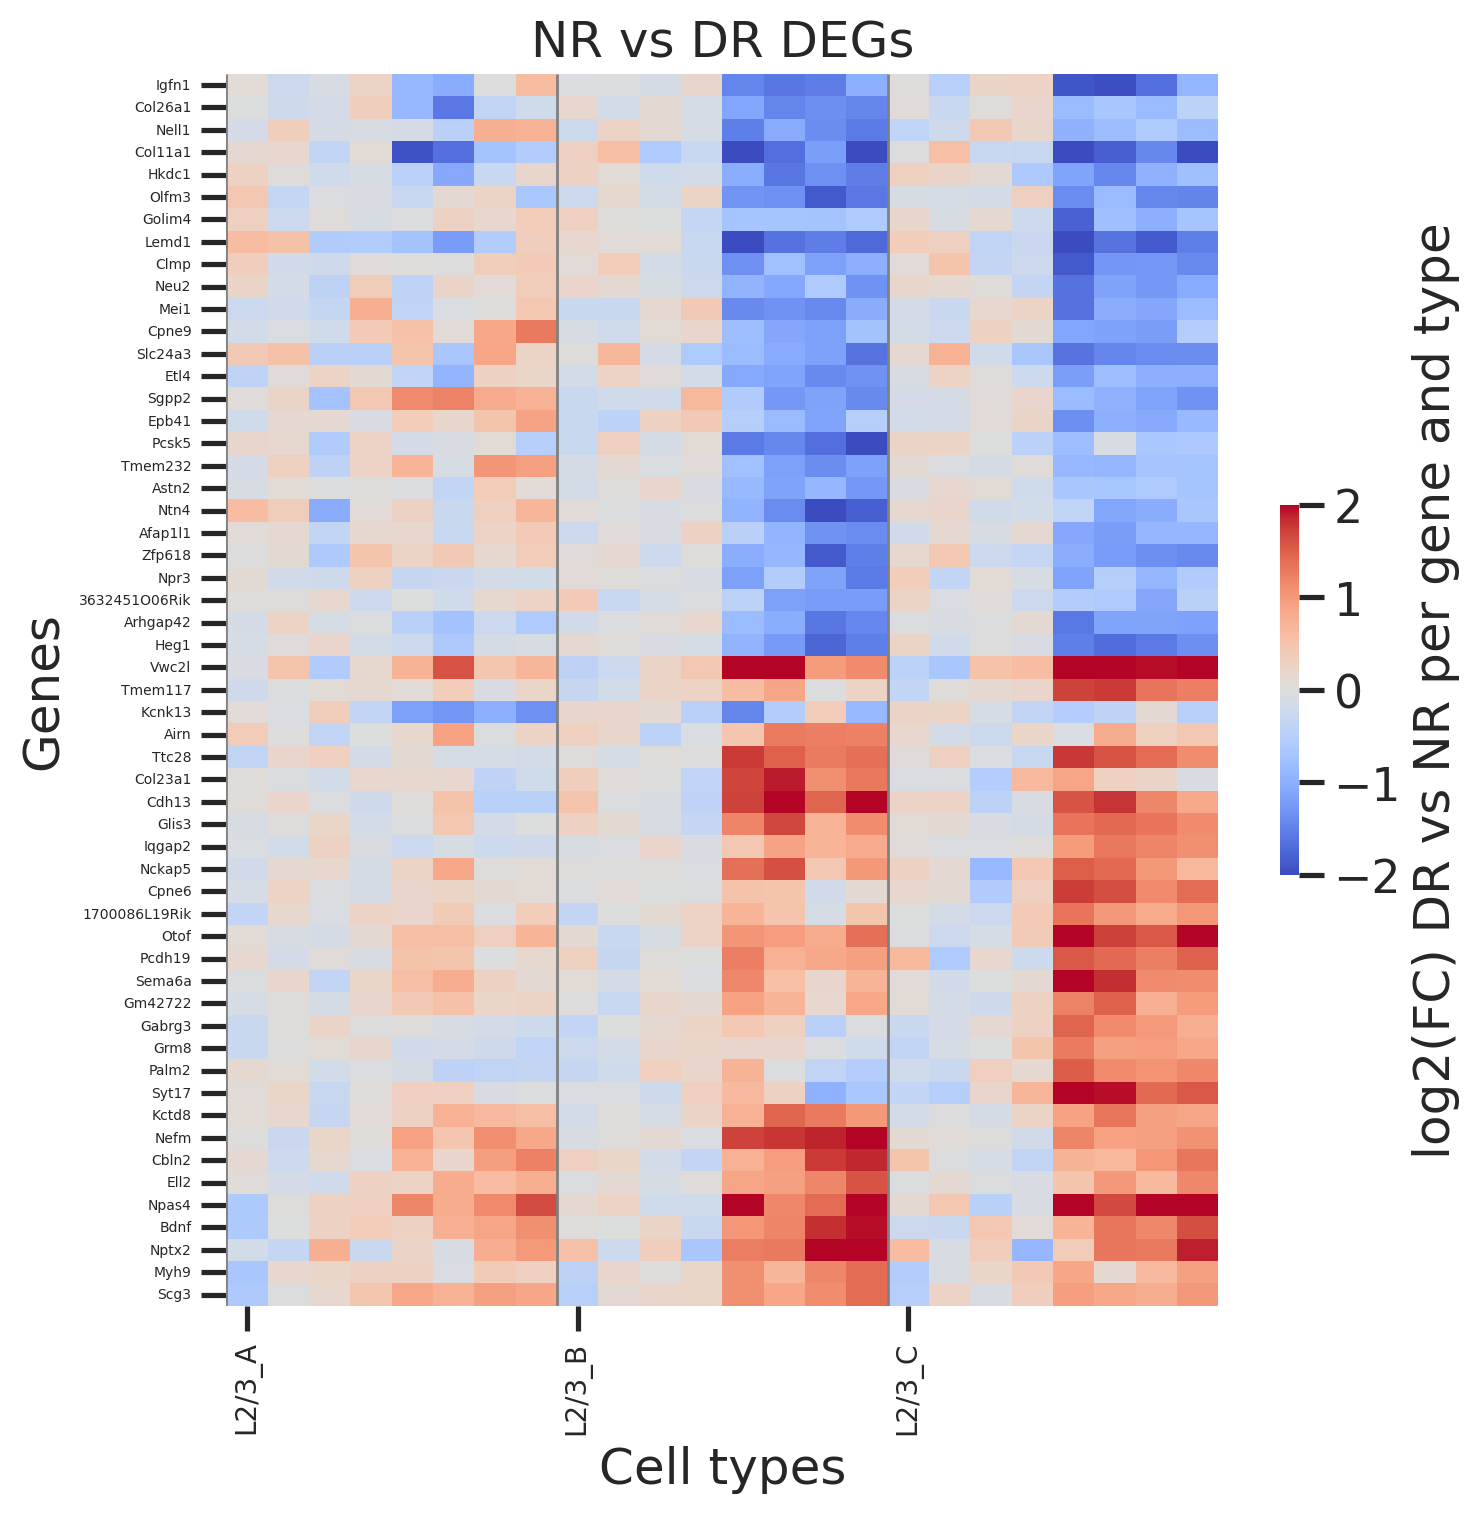

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(col[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(row[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

In [55]:
row[rowidx], row[rowidx].shape

(array(['Igfn1', 'Col26a1', 'Nell1', 'Col11a1', 'Hkdc1', 'Olfm3', 'Golim4',
        'Lemd1', 'Clmp', 'Neu2', 'Mei1', 'Cpne9', 'Slc24a3', 'Etl4',
        'Sgpp2', 'Epb41', 'Pcsk5', 'Tmem232', 'Astn2', 'Ntn4', 'Afap1l1',
        'Zfp618', 'Npr3', '3632451O06Rik', 'Arhgap42', 'Heg1', 'Vwc2l',
        'Tmem117', 'Kcnk13', 'Airn', 'Ttc28', 'Col23a1', 'Cdh13', 'Glis3',
        'Iqgap2', 'Nckap5', 'Cpne6', '1700086L19Rik', 'Otof', 'Pcdh19',
        'Sema6a', 'Gm42722', 'Gabrg3', 'Grm8', 'Palm2', 'Syt17', 'Kctd8',
        'Nefm', 'Cbln2', 'Ell2', 'Npas4', 'Bdnf', 'Nptx2', 'Myh9', 'Scg3'],
       dtype=object),
 (55,))

In [49]:
# save dfplot
# save res

In [50]:
# fout = '/data/qlyu/v1/results/L23type_union_DR_genes_annot_May3.csv'
# dfplot.to_csv(fout, header=True, index=True)
# dfplot

In [51]:
# !head $fout

In [52]:
# fout = '/data/qlyu/v1/results/L23DR_genes_May3.csv'
# res.to_csv(fout, header=True, index=False)
# res

In [53]:
# !head $fout

In [57]:
df2.set_index('gene').loc['Npas4']

group           B0
ispicked      True
P17on            B
P14         unsure
DR               2
DR_DE         True
DR_updn      DR_up
Name: Npas4, dtype: object